# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

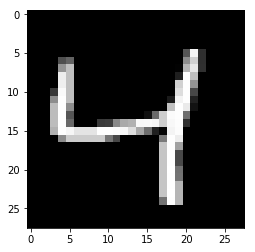

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
img.shape

(784,)

In [21]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size))
targets_ = tf.placeholder(tf.float32, shape=(None, image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, units=image_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# print(logits.shape)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [22]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [24]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6896
Epoch: 1/20... Training loss: 0.6863
Epoch: 1/20... Training loss: 0.6822
Epoch: 1/20... Training loss: 0.6771
Epoch: 1/20... Training loss: 0.6719
Epoch: 1/20... Training loss: 0.6638
Epoch: 1/20... Training loss: 0.6560
Epoch: 1/20... Training loss: 0.6472
Epoch: 1/20... Training loss: 0.6370
Epoch: 1/20... Training loss: 0.6246
Epoch: 1/20... Training loss: 0.6099
Epoch: 1/20... Training loss: 0.5960
Epoch: 1/20... Training loss: 0.5797
Epoch: 1/20... Training loss: 0.5614
Epoch: 1/20... Training loss: 0.5432
Epoch: 1/20... Training loss: 0.5287
Epoch: 1/20... Training loss: 0.5070
Epoch: 1/20... Training loss: 0.4902
Epoch: 1/20... Training loss: 0.4713
Epoch: 1/20... Training loss: 0.4532
Epoch: 1/20... Training loss: 0.4346
Epoch: 1/20... Training loss: 0.4179
Epoch: 1/20... Training loss: 0.4034
Epoch: 1/20... Training loss: 0.3920
Epoch: 1/20... Training loss: 0.3787
Epoch: 1/20... Training loss: 0.3703
E

Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1862
E

Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1562
E

Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1355
E

Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1224
E

Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1169
E

Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1123
E

Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1075
E

Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1033
E

Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1005
E

Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1004
E

Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.1002
E

Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0898
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1010
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.1004
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0984
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

RuntimeError: Attempted to use a closed Session.

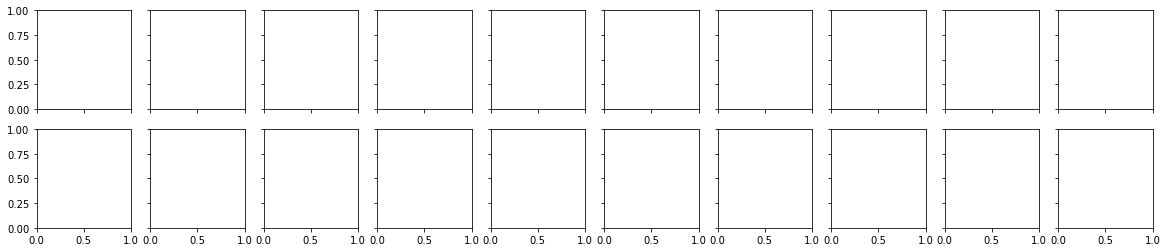

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [ ]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.